# Analysis
Trend 1: Lower lattitudes have higher temperatures compared to areas with higher lattitudes.
Trend 2: Absence of lower humidity values near the equator and Arctic, distinctive dry areas correspond to desert climate regions.
Trend 3: Absence of lower cloudiness values near the equator can be explained by high humidity in that area.

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json

# Import API key
api_key =  "80891f3d957cf3418489d3ddacc8b42d"
#from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [122]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#cities

609

In [123]:
#api.openweathermap.org/data/2.5/weather?q={city name}
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

cloudiness = []
country =[]
dt = []
humidity = []
lat = []
lon = []
temp_max = []
wind = []

#response = requests.get(query_url + cities[2]).json()
#print(json.dumps(response, indent=4, sort_keys=True))

In [124]:

for city in cities:
    
    response = requests.get(query_url + city).json()
    cloudiness.append(response.get('clouds',{}).get('all'))
    country.append(response.get('sys',{}).get('country'))
    dt.append(response.get('dt',{}))
    humidity.append(response.get('main',{}).get('humidity'))
    lat.append(response.get('coord',{}).get('lat'))
    lon.append(response.get('coord',{}).get('lon'))
    temp_max.append(response.get('main',{}).get('temp_max'))
    wind.append(response.get('wind',{}).get('speed'))
    print('Processing '+city)

print('Done')               

Processing arraial do cabo
Processing qaanaaq
Processing new norfolk
Processing arman
Processing ushuaia
Processing cape town
Processing kaitangata
Processing mataura
Processing santa rosa
Processing coihaique
Processing ancud
Processing bethel
Processing punta arenas
Processing zlatoustovsk
Processing vaini
Processing chuy
Processing bengkulu
Processing port alfred
Processing saint george
Processing albany
Processing nanortalik
Processing stege
Processing busselton
Processing pevek
Processing yellowknife
Processing baghdad
Processing rikitea
Processing nguiu
Processing saldanha
Processing kavaratti
Processing eucaliptus
Processing atuona
Processing tuktoyaktuk
Processing saint-augustin
Processing bajil
Processing guider
Processing ribeira grande
Processing barrow
Processing shenjiamen
Processing vardo
Processing kathu
Processing paraiso
Processing coahuayana
Processing vaitupu
Processing esperance
Processing berlevag
Processing hithadhoo
Processing ucluelet
Processing mirabad
Processi

Processing alta floresta
Processing luganville
Processing benguela
Processing caldwell
Processing lasa
Processing bethanien
Processing thoen
Processing sambava
Processing dourados
Processing flin flon
Processing hargeysa
Processing drayton valley
Processing galesong
Processing kysucke nove mesto
Processing karratha
Processing formoso do araguaia
Processing darhan
Processing meulaboh
Processing attawapiskat
Processing pacifica
Processing sun city west
Processing karasuk
Processing acapulco
Processing pafos
Processing funtua
Processing corlu
Processing mordovo
Processing mullaitivu
Processing sri aman
Processing karistos
Processing taft
Processing scottsbluff
Processing marica
Processing the pas
Processing xai-xai
Processing joura
Processing margate
Processing vilyuysk
Processing garowe
Processing arlit
Processing las palmas
Processing bilma
Processing severo-kurilsk
Processing kijabe
Processing sisimiut
Processing bani walid
Processing novikovo
Processing mokrousovo
Processing sao joao 

In [125]:
weather_dict = {
   "Cities" : cities,
    "Cloudiness" : cloudiness,
    "Country": country,
    "Date": dt,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng":  lon,
    "Max Temp" : temp_max,
    "Wind Speed" : wind
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head(20)

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,arraial do cabo,75.0,BR,1565917577,77.0,-22.97,-42.02,16.00,1.00
1,qaanaaq,0.0,GL,1565917578,46.0,77.48,-69.36,5.16,1.66
2,new norfolk,75.0,AU,1565917578,76.0,-42.78,147.06,10.56,3.10
3,arman,0.0,RU,1565917578,46.0,59.70,150.17,18.56,1.81
4,ushuaia,20.0,AR,1565917429,64.0,-54.81,-68.31,3.00,7.70
5,cape town,20.0,ZA,1565917522,93.0,-33.93,18.42,14.44,6.70
6,kaitangata,79.0,NZ,1565917579,63.0,-46.28,169.85,11.56,6.79
7,mataura,96.0,NZ,1565917579,67.0,-46.19,168.86,13.33,4.02
8,santa rosa,100.0,AR,1565917579,53.0,-36.62,-64.29,10.36,4.03
9,coihaique,75.0,CL,1565917579,64.0,-45.58,-72.07,4.00,1.00


In [126]:
weather_data = weather_data.dropna(how='any')
weather_data.count()

Cities        533
Cloudiness    533
Country       533
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

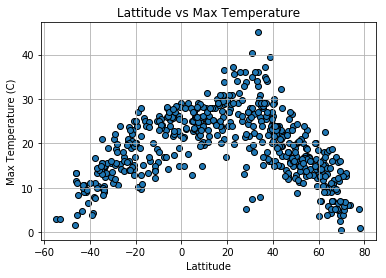

In [127]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'],edgecolor='black')
plt.title("Lattitude vs Max Temperature")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

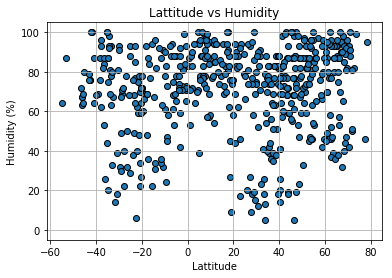

In [137]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'],edgecolor='black')
plt.title("Lattitude vs Humidity")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

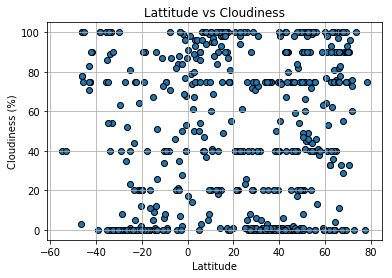

In [99]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'],edgecolor='black')
plt.title("Lattitude vs Cloudiness")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

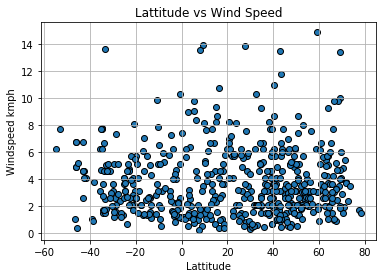

In [100]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'],edgecolor='black')
plt.title("Lattitude vs Wind Speed")
plt.xlabel("Lattitude")
plt.ylabel("Windspeed kmph")
plt.grid()
plt.show